**Python version:**  3.x
Author: Ema Ilic

So far, I have applied and tested all the DR methods we have studied + one I found in the Vipin Kumar textbook (SVD).


### Variabili da Inizializzare

In [4]:
# set the output file name
#outFileName = 'Out_File_Name'

# set the path of the directory where your modules are
modulesPath = 'C:\\Users\\email\\Documents\\GitHub\\AdvDataMining\\__Repo__'

#### Moduli

In [5]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Files and Modules for the project:', modulesList,sep='\n')


from collections import defaultdict
import itertools

%matplotlib inline

import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import data_understanding
import data_preparation
import df_handle

Available Files and Modules for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'data_preparation.py', 'data_understanding.py', 'df_handle.py', 'modeling.py', 'model_evaluation.py', '__pycache__']


In [6]:
df = df_handle.setup_df('datatraining.txt')

In [7]:
X_train, X_test, y_train, y_test = df_handle.setup_df('datatraining.txt', 'Occupancy', 'datatest.txt')
#X_Train are the dependent variables in the training set and y_train is the independent variable in the training test (Occupancy)

In [8]:
X_train.shape

(8143, 6)

In [9]:
del X_train['date']
del X_test['date']

In [10]:
head, tail, objectsN, attributesN, types, missValues, nullValues = data_understanding.dataset_state(df)

statistics, pearson_corr, spearman_corr, kendall_corr = data_understanding.numeric_columns_stats(df)

# initial dataset


In [11]:
head


date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1

# Task 1.4.1

Try to reduce the dimensionality of the dataset using the methods studied (or new ones).\n
Methods studied: Feature Selection & Feature Projection\n
Feature Selection: Variance Treshold (myb too simple?), Univariate Feature Selection,  Recursive Feature Elimination (RFE)\n
Feature Projection: PCA\n
New Method: SVD (Singular Value Decomposition)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [13]:
clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



# Variance Threshold

Experimenting with a couple of different threshold  values

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [17]:
X_train_sel=(0,0)
b=X_train_sel
for x in range (10000000):
    sel = VarianceThreshold(threshold=(x))
    X_train_sel = sel.fit_transform(X_train)
    if X_train_sel.shape!=b:
        b=X_train_sel.shape
        print(b, x)

(8143, 5) 0
(8143, 4) 1
(8143, 3) 2
(8143, 2) 31
(8143, 1) 37926


ValueError: No feature in X meets the variance threshold 98786.00000

In [54]:
sel = VarianceThreshold(threshold=(0.16))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(8143, 4)

In [55]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [56]:
sel = VarianceThreshold(threshold=3)
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(8143, 3)

In [57]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [58]:
#While the threshold in <=30, the variables yielded are 3. If the threshold is more than 30, the variables yielded are 2.
sel = VarianceThreshold(threshold=31)
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(8143, 2)

In [59]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [18]:
#While the threshold in <=30, the variables yielded are 3. If the threshold is more than 30, the variables yielded are 2.
sel = VarianceThreshold(threshold=37926)
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(8143, 1)

In [19]:
X_train_sel

array([[721.25      ],
       [714.        ],
       [713.5       ],
       ...,
       [798.5       ],
       [820.33333333],
       [821.        ]])

# Univariate Feature Selection

In the following section we are experimenting with k=2,3,4

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
X_train.shape

(8143, 5)

In [31]:
sel = SelectKBest(k=1)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(8143, 1)

In [32]:
X_train_sel

array([[426. ],
       [429.5],
       [426. ],
       ...,
       [433. ],
       [433. ],
       [447. ]])

In [33]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [34]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(8143, 2)

In [35]:
X_train_sel

array([[426.        , 721.25      ],
       [429.5       , 714.        ],
       [426.        , 713.5       ],
       ...,
       [433.        , 798.5       ],
       [433.        , 820.33333333],
       [447.        , 821.        ]])

In [36]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [37]:
sel = SelectKBest(k=3)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(8143, 3)

In [38]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [39]:
sel = SelectKBest(k=4)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(8143, 4)

In [40]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



# Recursive Feature Elimination

In [70]:
from sklearn.feature_selection import SelectFromModel

In [71]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(8143, 1)

In [72]:
X_train_sel
#From the result we can tell that the variable to keep is Light cus only Light has values around 400... However, is there
#a more elegant way to discover which variable/variables to keep?

array([[426. ],
       [429.5],
       [426. ],
       ...,
       [433. ],
       [433. ],
       [447. ]])

In [73]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



# PCA

Testing with k=2,3,4

In [74]:
from sklearn.decomposition import PCA

In [75]:
#K=2
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [76]:
X_train_pca.shape

(8143, 2)

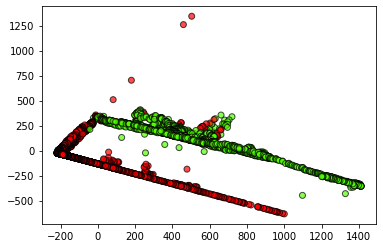

In [77]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [78]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975234521575985
F1-score [0.98025135 0.9668008 ]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



In [79]:
#K=3
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(8143, 3)

In [80]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975234521575985
F1-score [0.98025135 0.9668008 ]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



In [81]:
#K=4
pca = PCA(n_components=4)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(8143, 4)

In [82]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975234521575985
F1-score [0.98025135 0.9668008 ]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



In [83]:
#Plotting an eigenvector plot doesn't work
X_pca = PCA(n_components=2).fit_transform(X_train_pca.data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_train_pca.target, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [ ]:
type(iris)

In [ ]:
type(df)

In [ ]:
help(iris.target)

# SVD (Singular Value Decomposition)

Testing with k=2,3,4

In [84]:
from sklearn.decomposition import TruncatedSVD

In [85]:
#K=2
svd = TruncatedSVD(n_components=2)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

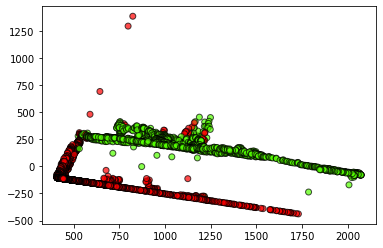

In [86]:
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [87]:
X_test_svd = svd.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_svd, y_train)

y_pred = clf.predict(X_test_svd)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9703564727954972
F1-score [0.97614014 0.96087172]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.93      1.00      0.96       972

    accuracy                           0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



In [88]:
#K=3
svd = TruncatedSVD(n_components=3)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

In [89]:
X_test_svd = svd.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_svd, y_train)

y_pred = clf.predict(X_test_svd)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9703564727954972
F1-score [0.97614014 0.96087172]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.93      1.00      0.96       972

    accuracy                           0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



In [90]:
#K=4
svd = TruncatedSVD(n_components=4)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

In [91]:
X_test_svd = svd.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_svd, y_train)

y_pred = clf.predict(X_test_svd)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9703564727954972
F1-score [0.97614014 0.96087172]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.93      1.00      0.96       972

    accuracy                           0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



## Output Files

In [92]:
#df.to_csv(path_or_buf = modulesPath + '\\' + outFileName + '.csv', sep=',', encoding='utf-8', index=False)